In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [173]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', sep = '\s+', header = None, names = column_names) 
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


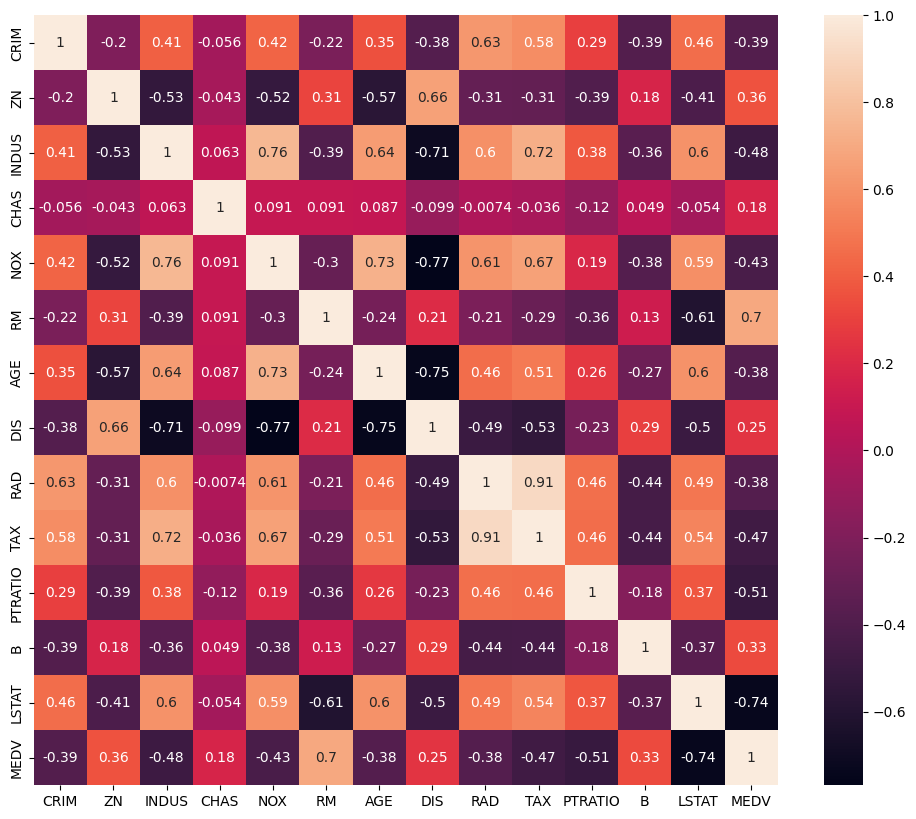

In [17]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize= (12,10))
g = sns.heatmap(df_corr, annot=True, ax=ax)
plt.show()


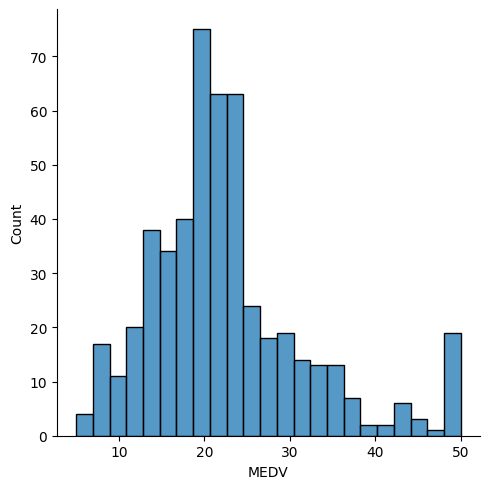

In [19]:
g = sns.displot(data = df, x = 'MEDV')
plt.show()

In [22]:
df_high_val = df[df['MEDV']>40]
df_high_val

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD    TAX   
98   0.08187   0.0   2.89     0  0.4450  7.820   36.9  3.4952    2  276.0  \
157  1.22358   0.0  19.58     0  0.6050  6.943   97.4  1.8773    5  403.0   
161  1.46336   0.0  19.58     0  0.6050  7.489   90.8  1.9709    5  403.0   
162  1.83377   0.0  19.58     1  0.6050  7.802   98.2  2.0407    5  403.0   
163  1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403.0   
166  2.01019   0.0  19.58     0  0.6050  7.929   96.2  2.0459    5  403.0   
186  0.05602   0.0   2.46     0  0.4880  7.831   53.6  3.1992    3  193.0   
195  0.01381  80.0   0.46     0  0.4220  7.875   32.0  5.6484    4  255.0   
202  0.02177  82.5   2.03     0  0.4150  7.610   15.7  6.2700    2  348.0   
203  0.03510  95.0   2.68     0  0.4161  7.853   33.2  5.1180    4  224.0   
204  0.02009  95.0   2.68     0  0.4161  8.034   31.9  5.1180    4  224.0   
224  0.31533   0.0   6.20     0  0.5040  8.266   78.3  2.8944    8  307.0   
225  0.52693   0.0   6.20     0  0.5040  8.725   83.0  2.8944    8  307.0   
228  0.29819   0.0   6.20     0  0.5040  7.686   17.0  3.3751    8  307.0   
232  0.57529   0.0   6.20     0  0.5070  8.337   73.3  3.8384    8  307.0   
233  0.33147   0.0   6.20     0  0.5070  8.247   70.4  3.6519    8  307.0   
253  0.36894  22.0   5.86     0  0.4310  8.259    8.4  8.9067    7  330.0   
256  0.01538  90.0   3.75     0  0.3940  7.454   34.2  6.3361    3  244.0   
257  0.61154  20.0   3.97     0  0.6470  8.704   86.9  1.8010    5  264.0   
261  0.53412  20.0   3.97     0  0.6470  7.520   89.4  2.1398    5  264.0   
262  0.52014  20.0   3.97     0  0.6470  8.398   91.5  2.2885    5  264.0   
267  0.57834  20.0   3.97     0  0.5750  8.297   67.0  2.4216    5  264.0   
268  0.54050  20.0   3.97     0  0.5750  7.470   52.6  2.8720    5  264.0   
280  0.03578  20.0   3.33     0  0.4429  7.820   64.5  4.6947    5  216.0   
282  0.06129  20.0   3.33     1  0.4429  7.645   49.7  5.2119    5  216.0   
283  0.01501  90.0   1.21     1  0.4010  7.923   24.8  5.8850    1  198.0   
368  4.89822   0.0  18.10     0  0.6310  4.970  100.0  1.3325   24  666.0   
369  5.66998   0.0  18.10     1  0.6310  6.683   96.8  1.3567   24  666.0   
370  6.53876   0.0  18.10     1  0.6310  7.016   97.5  1.2024   24  666.0   
371  9.23230   0.0  18.10     0  0.6310  6.216  100.0  1.1691   24  666.0   
372  8.26725   0.0  18.10     1  0.6680  5.875   89.6  1.1296   24  666.0   

     PTRATIO       B  LSTAT  MEDV  
98      18.0  393.53   3.57  43.8  
157     14.7  363.43   4.59  41.3  
161     14.7  374.43   1.73  50.0  
162     14.7  389.61   1.92  50.0  
163     14.7  388.45   3.32  50.0  
166     14.7  369.30   3.70  50.0  
186     17.8  392.63   4.45  50.0  
195     14.4  394.23   2.97  50.0  
202     14.7  395.38   3.11  42.3  
203     14.7  392.78   3.81  48.5  
204     14.7  390.55   2.88  50.0  
224     17.4  385.05   4.14  44.8  
225     17.4  382.00   4.63  50.0  
228     17.4  377.51   3.92  46.7  
232     17.4  385.91   2.47  41.7  
233     17.4  378.95   3.95  48.3  
253     19.1  396.90   3.54  42.8  
256     15.9  386.34   3.11  44.0  
257     13.0  389.70   5.12  50.0  
261     13.0  388.37   7.26  43.1  
262     13.0  386.86   5.91  48.8  
267     13.0  384.54   7.44  50.0  
268     13.0  390.30   3.16  43.5  
280     14.9  387.31   3.76  45.4  
282     14.9  377.07   3.01  46.0  
283     13.6  395.52   3.16  50.0  
368     20.2  375.52   3.26  50.0  
369     20.2  375.33   3.73  50.0  
370     20.2  392.05   2.96  50.0  
371     20.2  366.15   9.53  50.0  
372     20.2  347.88   8.88  50.0

In [27]:
df.describe()
#kaggle contibutor notes that ZN and CHAS might not be useful for regression because of bad spread of values
#this is backed up by correlation analysis, although ZN is much better fit than CHAS
#https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

CRIM          ZN       INDUS        CHAS         NOX          RM   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [36]:
#how many outliers in each column? 
for i,j in df.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    iqr = q3-q1
    outliers = j[(j<=q1-1.5*iqr) | (j>=q3+1.5*iqr)]
    p = np.shape(outliers)[0] * 100/np.shape(df)[0]
    print(i,p)

CRIM 13.043478260869565
ZN 13.438735177865613
INDUS 0.0
CHAS 100.0
NOX 0.0
RM 5.928853754940712
AGE 0.0
DIS 0.9881422924901185
RAD 0.0
TAX 0.0
PTRATIO 2.964426877470356
B 15.217391304347826
LSTAT 1.383399209486166
MEDV 7.905138339920948


<Axes: >

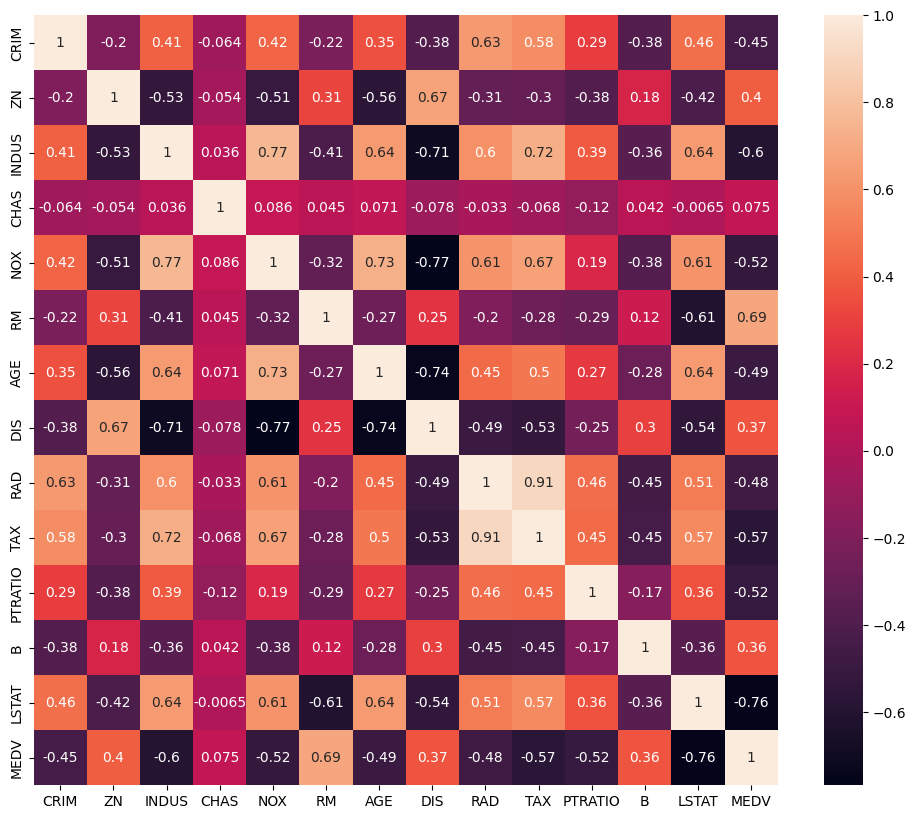

In [174]:
df_low_prices = df[df['MEDV']<50]
df_or_corr = df_low_prices.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_or_corr, annot=True, ax =ax)

In [79]:
corr_list = []
for i in df_corr:
    for j in df_corr:
        if df_corr[i][j]>0.6 or df_corr[i][j]<-0.6:
            if i!=j:
                if i!='MEDV' and j!='MEDV':
                    if (i,j,df_corr[i][j]) not in corr_list:
                        if (j,i,df_corr[i][j]) not in corr_list:
                            corr_list.append((i,j,df_corr[i][j]))
corr_list

[('CRIM', 'RAD', 0.6255051452626024),
 ('ZN', 'DIS', 0.6644082227621105),
 ('INDUS', 'NOX', 0.7636514469209139),
 ('INDUS', 'AGE', 0.6447785113552554),
 ('INDUS', 'DIS', -0.7080269887427675),
 ('INDUS', 'TAX', 0.7207601799515422),
 ('INDUS', 'LSTAT', 0.603799716476621),
 ('NOX', 'AGE', 0.7314701037859592),
 ('NOX', 'DIS', -0.7692301132258282),
 ('NOX', 'RAD', 0.6114405634855762),
 ('NOX', 'TAX', 0.6680232004030217),
 ('RM', 'LSTAT', -0.6138082718663955),
 ('AGE', 'DIS', -0.747880540868632),
 ('AGE', 'LSTAT', 0.6023385287262395),
 ('RAD', 'TAX', 0.9102281885331865)]

In [39]:
#https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies
#^talks about presence of multicollinearity within data, see below
#source says VIF>10 is severe and should be removed
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifs = pd.DataFrame()
vifs['Feature'] = df.columns
vifs["VIF"] = [variance_inflation_factor(df.values, i ) for i in range(len(df.columns))]
print(vifs)


    Feature         VIF
0      CRIM    2.131404
1        ZN    2.910004
2     INDUS   14.485874
3      CHAS    1.176266
4       NOX   74.004269
5        RM  136.101743
6       AGE   21.398863
7       DIS   15.430455
8       RAD   15.369980
9       TAX   61.939713
10  PTRATIO   87.227233
11        B   21.351015
12    LSTAT   12.615188
13     MEDV   24.503206


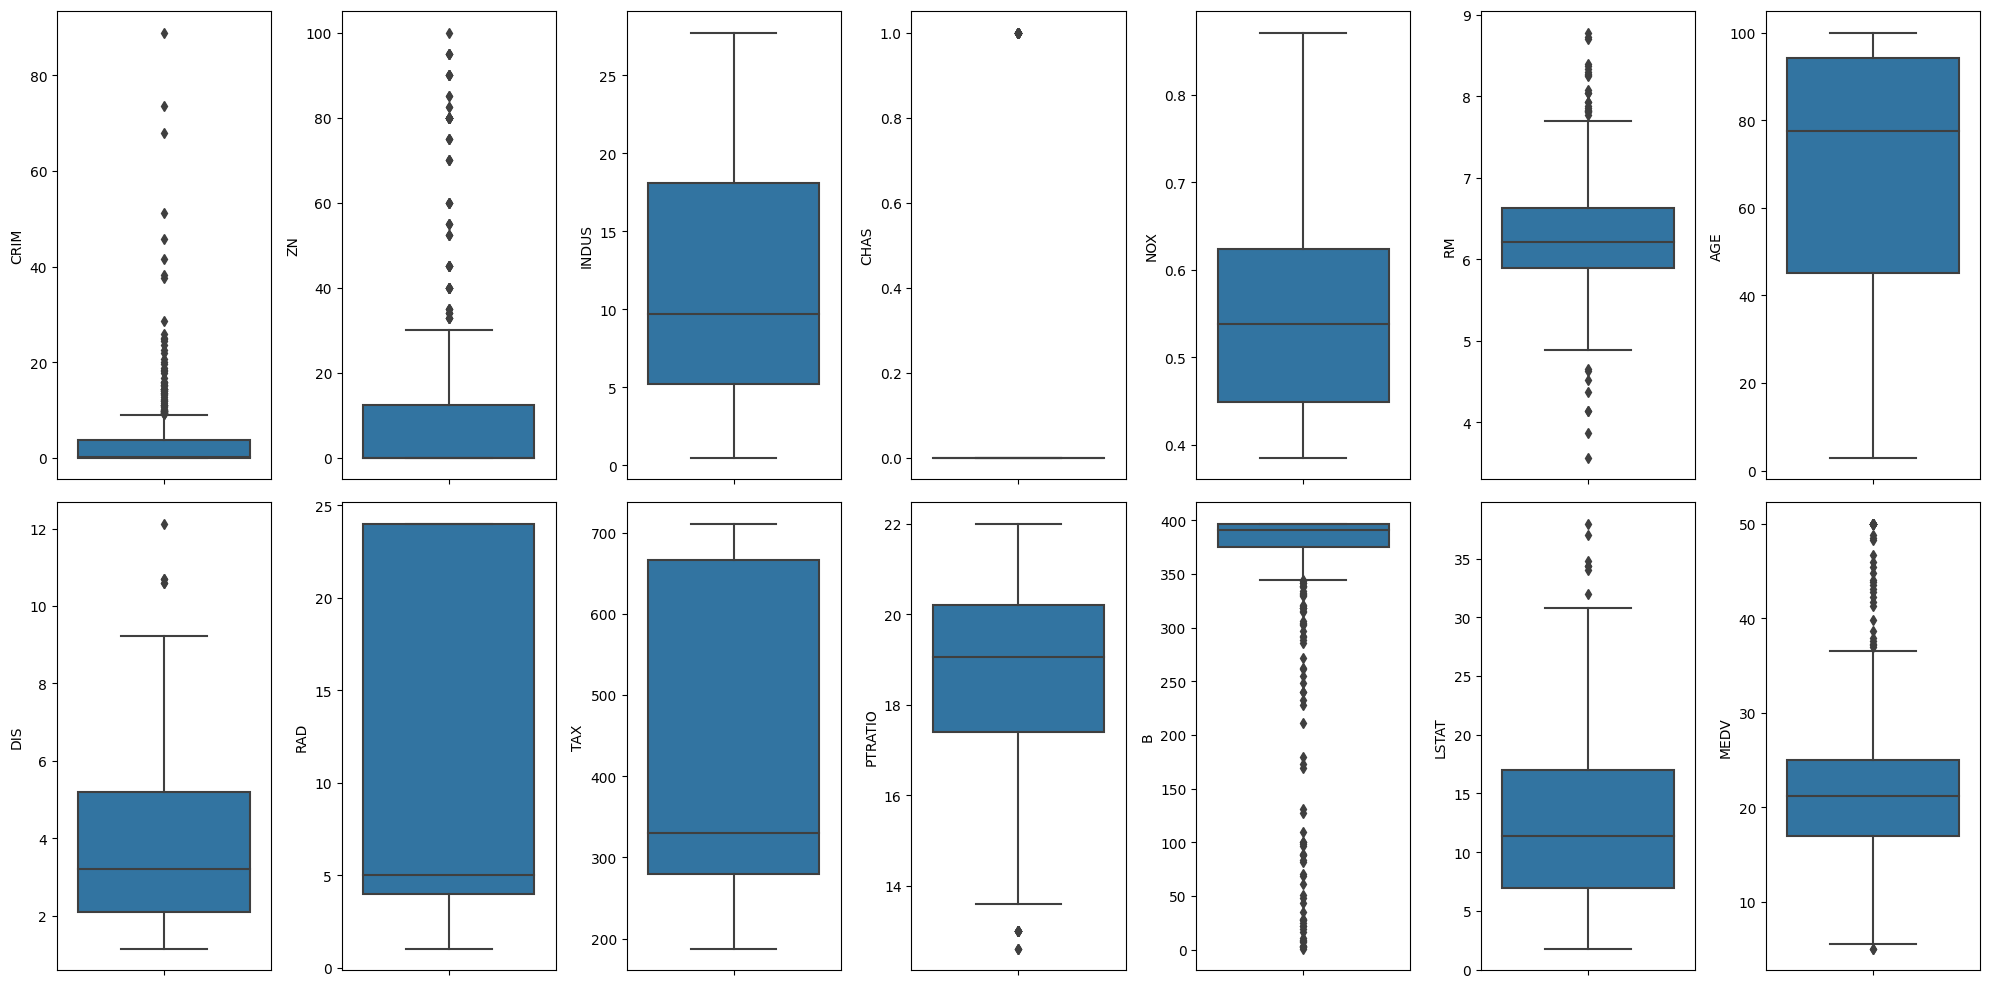

In [46]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20,10))
ax=ax.flatten()
index = 0
for i,j in df.items():
    sns.boxplot(y=i, data = df, ax=ax[index])
    index+=1
plt.tight_layout()

In [144]:
crim1 = df['CRIM'].quantile(0.25) 
crim3 = df['CRIM'].quantile(0.75)
crimiqr = crim3-crim1
# def mask(a):
#     if a['CRIM']<crim3+1.5*crimiqr and a['CRIM']>crim1-1.5*crimiqr:
#         return True
#     else:
#         return False
crim_mask1 = df['CRIM']<crim3+1.5*crimiqr 
crim_mask3 = df['CRIM']>crim1-1.5*crimiqr
df_crim_mask = df[crim_mask1][crim_mask3]
df_crim_mask.describe()



C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\1524130912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_crim_mask = df[crim_mask1][crim_mask3]


CRIM          ZN       INDUS        CHAS         NOX          RM   
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000  \
mean     1.198341   13.068182   10.092295    0.079545    0.536354    6.346398   
std      2.128147   24.563940    6.764409    0.270896    0.111927    0.672751   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.068962    0.000000    4.860000    0.000000    0.445000    5.926750   
50%      0.176440    0.000000    8.140000    0.000000    0.515000    6.227500   
75%      0.960870   20.000000   18.100000    0.000000    0.585000    6.636750   
max      8.982960  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000  \
mean    64.726136    4.103778    7.381818  369.572727   18.193864  371.056705   
std     28.029897    2.085384    7.149216  145.560574    2.205787   65.555250   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     40.250000    2.418025    4.000000  276.000000   16.600000  378.087500   
50%     70.400000    3.651900    5.000000  307.000000   18.600000  392.190000   
75%     90.850000    5.415900    6.000000  403.000000   20.200000  396.080000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV      nox_dis  
count  440.000000  440.000000   440.000000  
mean    11.201068   23.967727   131.002494  
std      6.011666    8.649953   205.687142  
min      1.730000    7.000000     1.887589  
25%      6.567500   18.800000    14.426366  
50%     10.140000   22.000000    48.960152  
75%     14.722500   26.775000   159.102081  
max     34.410000   50.000000  1783.394205

In [148]:
zn1 = df['ZN'].quantile(.25)
zn3 = df['ZN'].quantile(.75)
zniqr = zn3-zn1
zn_mask3 = df['ZN']<zn3+1.5*zniqr
zn_mask1 = df['ZN']>zn1-1.5*zniqr
df_zn_mask = df[zn_mask1][zn_mask3]
df_zn_mask.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM   
count  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  \
mean     4.167390    3.192922   12.366530    0.070776    0.575285    6.211132   
std      9.122023    7.821441    6.532035    0.256744    0.110766    0.697151   
min      0.006320    0.000000    1.380000    0.000000    0.409000    3.561000   
25%      0.124092    0.000000    6.200000    0.000000    0.489000    5.868250   
50%      0.410045    0.000000   10.590000    0.000000    0.547000    6.144000   
75%      4.797190    0.000000   18.100000    0.000000    0.647000    6.473250   
max     88.976200   30.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  \
mean    74.324886    3.340514   10.447489  423.920091   18.725342  351.580342   
std     25.381266    1.729506    9.003723  174.268896    2.066043   97.056327   
min      2.900000    1.129600    1.000000  188.000000   13.000000    0.320000   
25%     58.425000    1.989150    4.000000  284.000000   17.800000  372.762500   
50%     83.600000    2.781150    5.000000  384.000000   19.200000  390.955000   
75%     95.275000    4.256300   24.000000  666.000000   20.200000  396.192500   
max    100.000000    9.222900   24.000000  711.000000   21.200000  396.900000   

            LSTAT        MEDV     nox_dis  
count  438.000000  438.000000  438.000000  
mean    13.680388   21.435845   72.969589  
std      7.078181    8.912659  117.565353  
min      1.730000    5.000000    1.887589  
25%      8.215000   15.775000    8.296465  
50%     12.700000   20.350000   22.020027  
75%     17.630000   23.900000   77.372436  
max     37.970000   50.000000  784.690393

In [151]:
df_zn_crim = df_zn_mask[crim_mask1][crim_mask3]
df_zn_crim.describe()

C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\2591444844.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_zn_crim = df_zn_mask[crim_mask1][crim_mask3]
C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\2591444844.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_zn_crim = df_zn_mask[crim_mask1][crim_mask3]


CRIM          ZN       INDUS        CHAS         NOX          RM   
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000  \
mean     1.408990    3.759409   11.349301    0.083333    0.557244    6.271145   
std      2.251907    8.361963    6.585773    0.276758    0.109046    0.668410   
min      0.006320    0.000000    1.380000    0.000000    0.409000    3.561000   
25%      0.105125    0.000000    5.935000    0.000000    0.488000    5.887250   
50%      0.260420    0.000000    9.690000    0.000000    0.538000    6.148000   
75%      1.416643    0.000000   18.100000    0.000000    0.609000    6.489000   
max      8.982960   30.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000  \
mean    70.792742    3.625043    8.043011  380.970430   18.463710  367.688387   
std     25.721858    1.720955    7.550961  153.288663    2.138317   70.640349   
min      2.900000    1.129600    1.000000  188.000000   13.000000    0.320000   
25%     53.500000    2.286475    4.000000  277.000000   17.400000  377.070000   
50%     79.050000    3.215700    5.000000  307.000000   18.850000  391.705000   
75%     92.600000    4.512050    7.000000  432.000000   20.200000  396.007500   
max    100.000000    9.222900   24.000000  711.000000   21.200000  396.900000   

            LSTAT        MEDV     nox_dis  
count  372.000000  372.000000  372.000000  
mean    12.145242   22.938441   84.778290  
std      5.987661    8.406059  123.892716  
min      1.730000    7.000000    1.887589  
25%      7.555000   18.275000   12.291393  
50%     11.360000   21.300000   33.506690  
75%     15.802500   24.500000   92.066620  
max     34.410000   50.000000  784.690393

In [162]:
df_low_prices[crim_mask1][crim_mask3].describe()

C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\3648887835.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_low_prices[crim_mask1][crim_mask3].describe()
C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\3648887835.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_low_prices[crim_mask1][crim_mask3].describe()


CRIM          ZN       INDUS        CHAS         NOX          RM   
count  425.000000  425.000000  425.000000  425.000000  425.000000  425.000000  \
mean     1.160583   12.811765   10.044565    0.068235    0.535439    6.303264   
std      2.098710   24.084361    6.710824    0.252446    0.112574    0.614833   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.068990    0.000000    4.930000    0.000000    0.445000    5.924000   
50%      0.171710    0.000000    8.140000    0.000000    0.515000    6.209000   
75%      0.825260   20.000000   18.100000    0.000000    0.585000    6.606000   
max      8.982960  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  425.000000  425.000000  425.000000  425.000000  425.000000  425.000000  \
mean    64.323059    4.154009    7.298824  368.543529   18.263059  370.642847   
std     28.005105    2.084173    7.073244  144.260831    2.153622   66.627279   
min      2.900000    1.321600    1.000000  187.000000   12.600000    0.320000   
25%     40.100000    2.432900    4.000000  276.000000   16.800000  378.250000   
50%     70.200000    3.665900    5.000000  307.000000   18.600000  392.400000   
75%     90.300000    5.450900    6.000000  403.000000   20.200000  396.230000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV      nox_dis  
count  425.000000  425.000000   425.000000  
mean    11.454871   23.048941   134.113536  
std      5.949912    7.255896   208.234330  
min      1.980000    7.000000     3.066983  
25%      6.730000   18.700000    14.686420  
50%     10.290000   21.900000    49.480677  
75%     14.810000   25.000000   162.233411  
max     34.410000   48.800000  1783.394205

In [165]:
df_low_prices.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM   
count  490.000000  490.000000  490.000000  490.000000  490.000000  490.000000  \
mean     3.643241   11.112245   11.113143    0.059184    0.554307    6.245471   
std      8.722154   22.844626    6.821302    0.236209    0.116688    0.653147   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.881000   
50%      0.247510    0.000000    9.690000    0.000000    0.538000    6.185000   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.578000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

             AGE         DIS         RAD         TAX     PTRATIO           B   
count  490.00000  490.000000  490.000000  490.000000  490.000000  490.000000  \
mean    68.27898    3.834519    9.514286  408.002041   18.520000  355.855449   
std     28.16479    2.109948    8.691297  168.065190    2.110478   92.634273   
min      2.90000    1.137000    1.000000  187.000000   12.600000    0.320000   
25%     44.55000    2.111050    4.000000  280.250000   17.400000  375.912500   
50%     76.80000    3.275900    5.000000  330.000000   19.100000  391.770000   
75%     93.87500    5.214600   24.000000  666.000000   20.200000  396.322500   
max    100.00000   12.126500   24.000000  711.000000   22.000000  396.900000   

           LSTAT        MEDV      nox_dis  
count  490.00000  490.000000   490.000000  
mean    12.92402   21.635918   117.182476  
std      7.08318    7.865301   198.691277  
min      1.98000    5.000000     1.916102  
25%      7.34750   16.700000     9.833347  
50%     11.67500   20.900000    35.403127  
75%     17.11750   24.675000   142.007280  
max     37.97000   48.800000  1783.394205

In [164]:
X = df_low_prices[crim_mask1][crim_mask3][['RM', 'LSTAT', 'TAX', 'PTRATIO', 'CRIM', 'NOX']]
y = df_low_prices[crim_mask1][crim_mask3]['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
model = GradientBoostingRegressor()
params = {'min_samples_leaf':[5,10,15,20,25,30], 'max_depth':[2,3,4,5,6,7,8,9,10]}
clf = GridSearchCV(estimator=model, param_grid=params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(clf.best_params_)

C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\1755457007.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = df_low_prices[crim_mask1][crim_mask3][['RM', 'LSTAT', 'TAX', 'PTRATIO', 'CRIM', 'NOX']]
C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\1755457007.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = df_low_prices[crim_mask1][crim_mask3][['RM', 'LSTAT', 'TAX', 'PTRATIO', 'CRIM', 'NOX']]
C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\1755457007.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = df_low_prices[crim_mask1][crim_mask3]['MEDV']
C:\Users\HaydenShaw\AppData\Local\Temp\ipykernel_18244\1755457007.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = df_low_prices[crim_mask1][crim_mask3]['MEDV']


7.530140122832317
2.0017890296561287
0.8705533982978289
{'max_depth': 3, 'min_samples_leaf': 10}


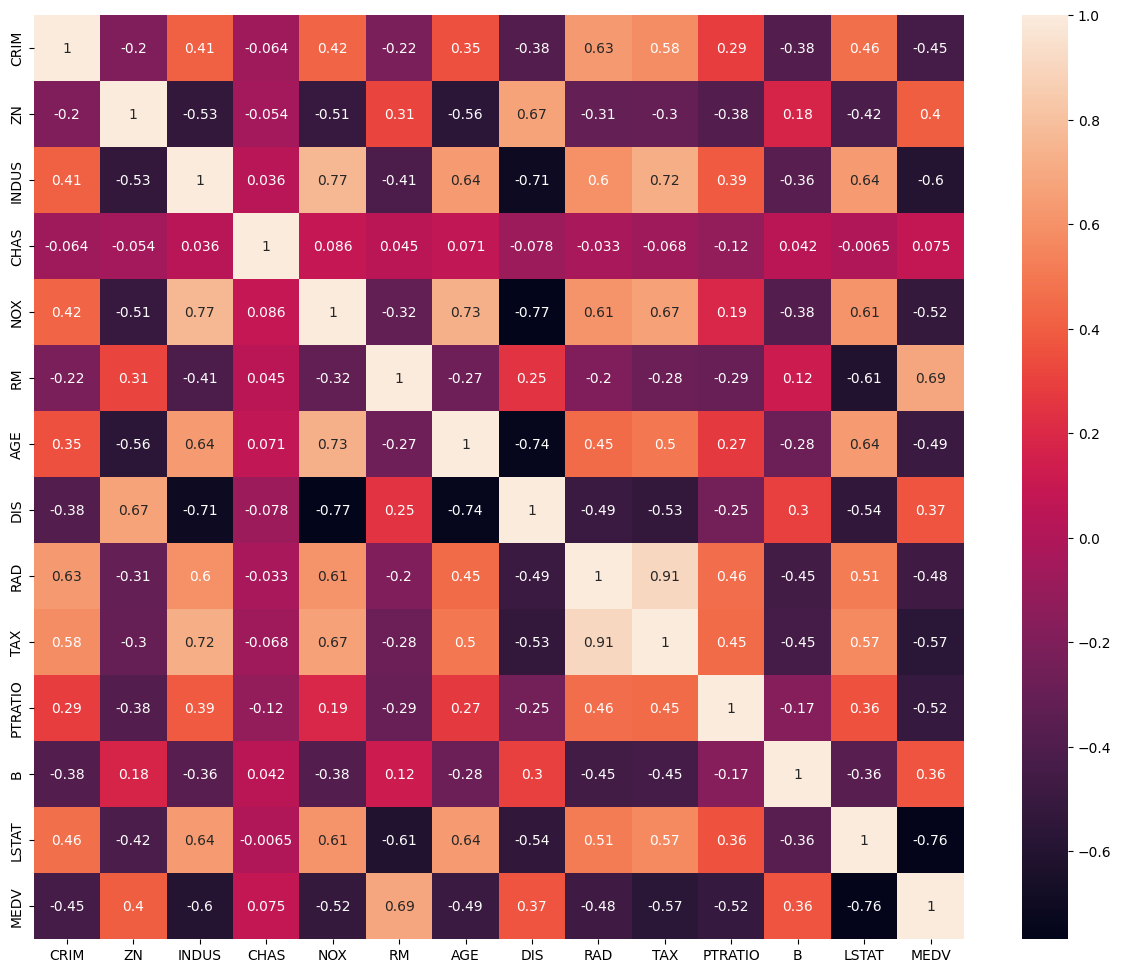

In [180]:
fig, ax = plt.subplots(figsize = (15,12))
g = sns.heatmap(df_or_corr, annot=True, ax =ax)
plt.show()

In [310]:
X = df_low_prices[['RM',  'TAX', 'PTRATIO', 'LSTAT', 'INDUS']]
y = df_low_prices['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)
model = GradientBoostingRegressor()
clf = GridSearchCV(estimator=model, param_grid=params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.9020275933906641
6.049886388821878
1.835068885142754


In [198]:
from sklearn import linear_model
X = df_low_prices[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_low_prices['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)
reg = linear_model.Lasso(alpha =0.1)
reg.fit(X_train,y_train)
reg.predict(X_test)
print(reg.coef_)

[-0.10541347  0.02753603 -0.1062433  -0.         -0.          3.59918683
 -0.0344265  -0.88762626  0.17725824 -0.01403281 -0.64709358 -0.37698856]


In [237]:
for i in df_low_prices.columns:
    print(i)

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV


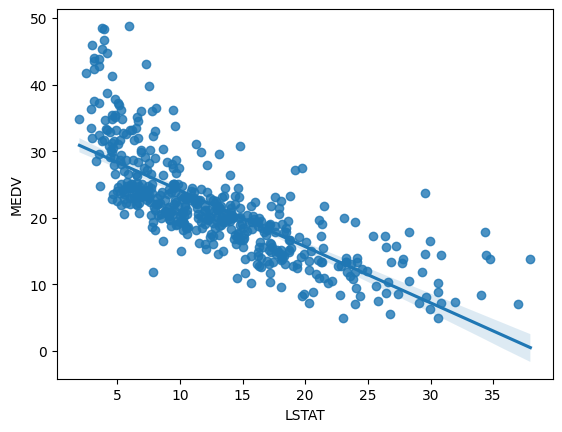

In [234]:
sns.regplot(data = df_low_prices, x = df_low_prices['LSTAT'], y = df_low_prices['MEDV'])
plt.show()

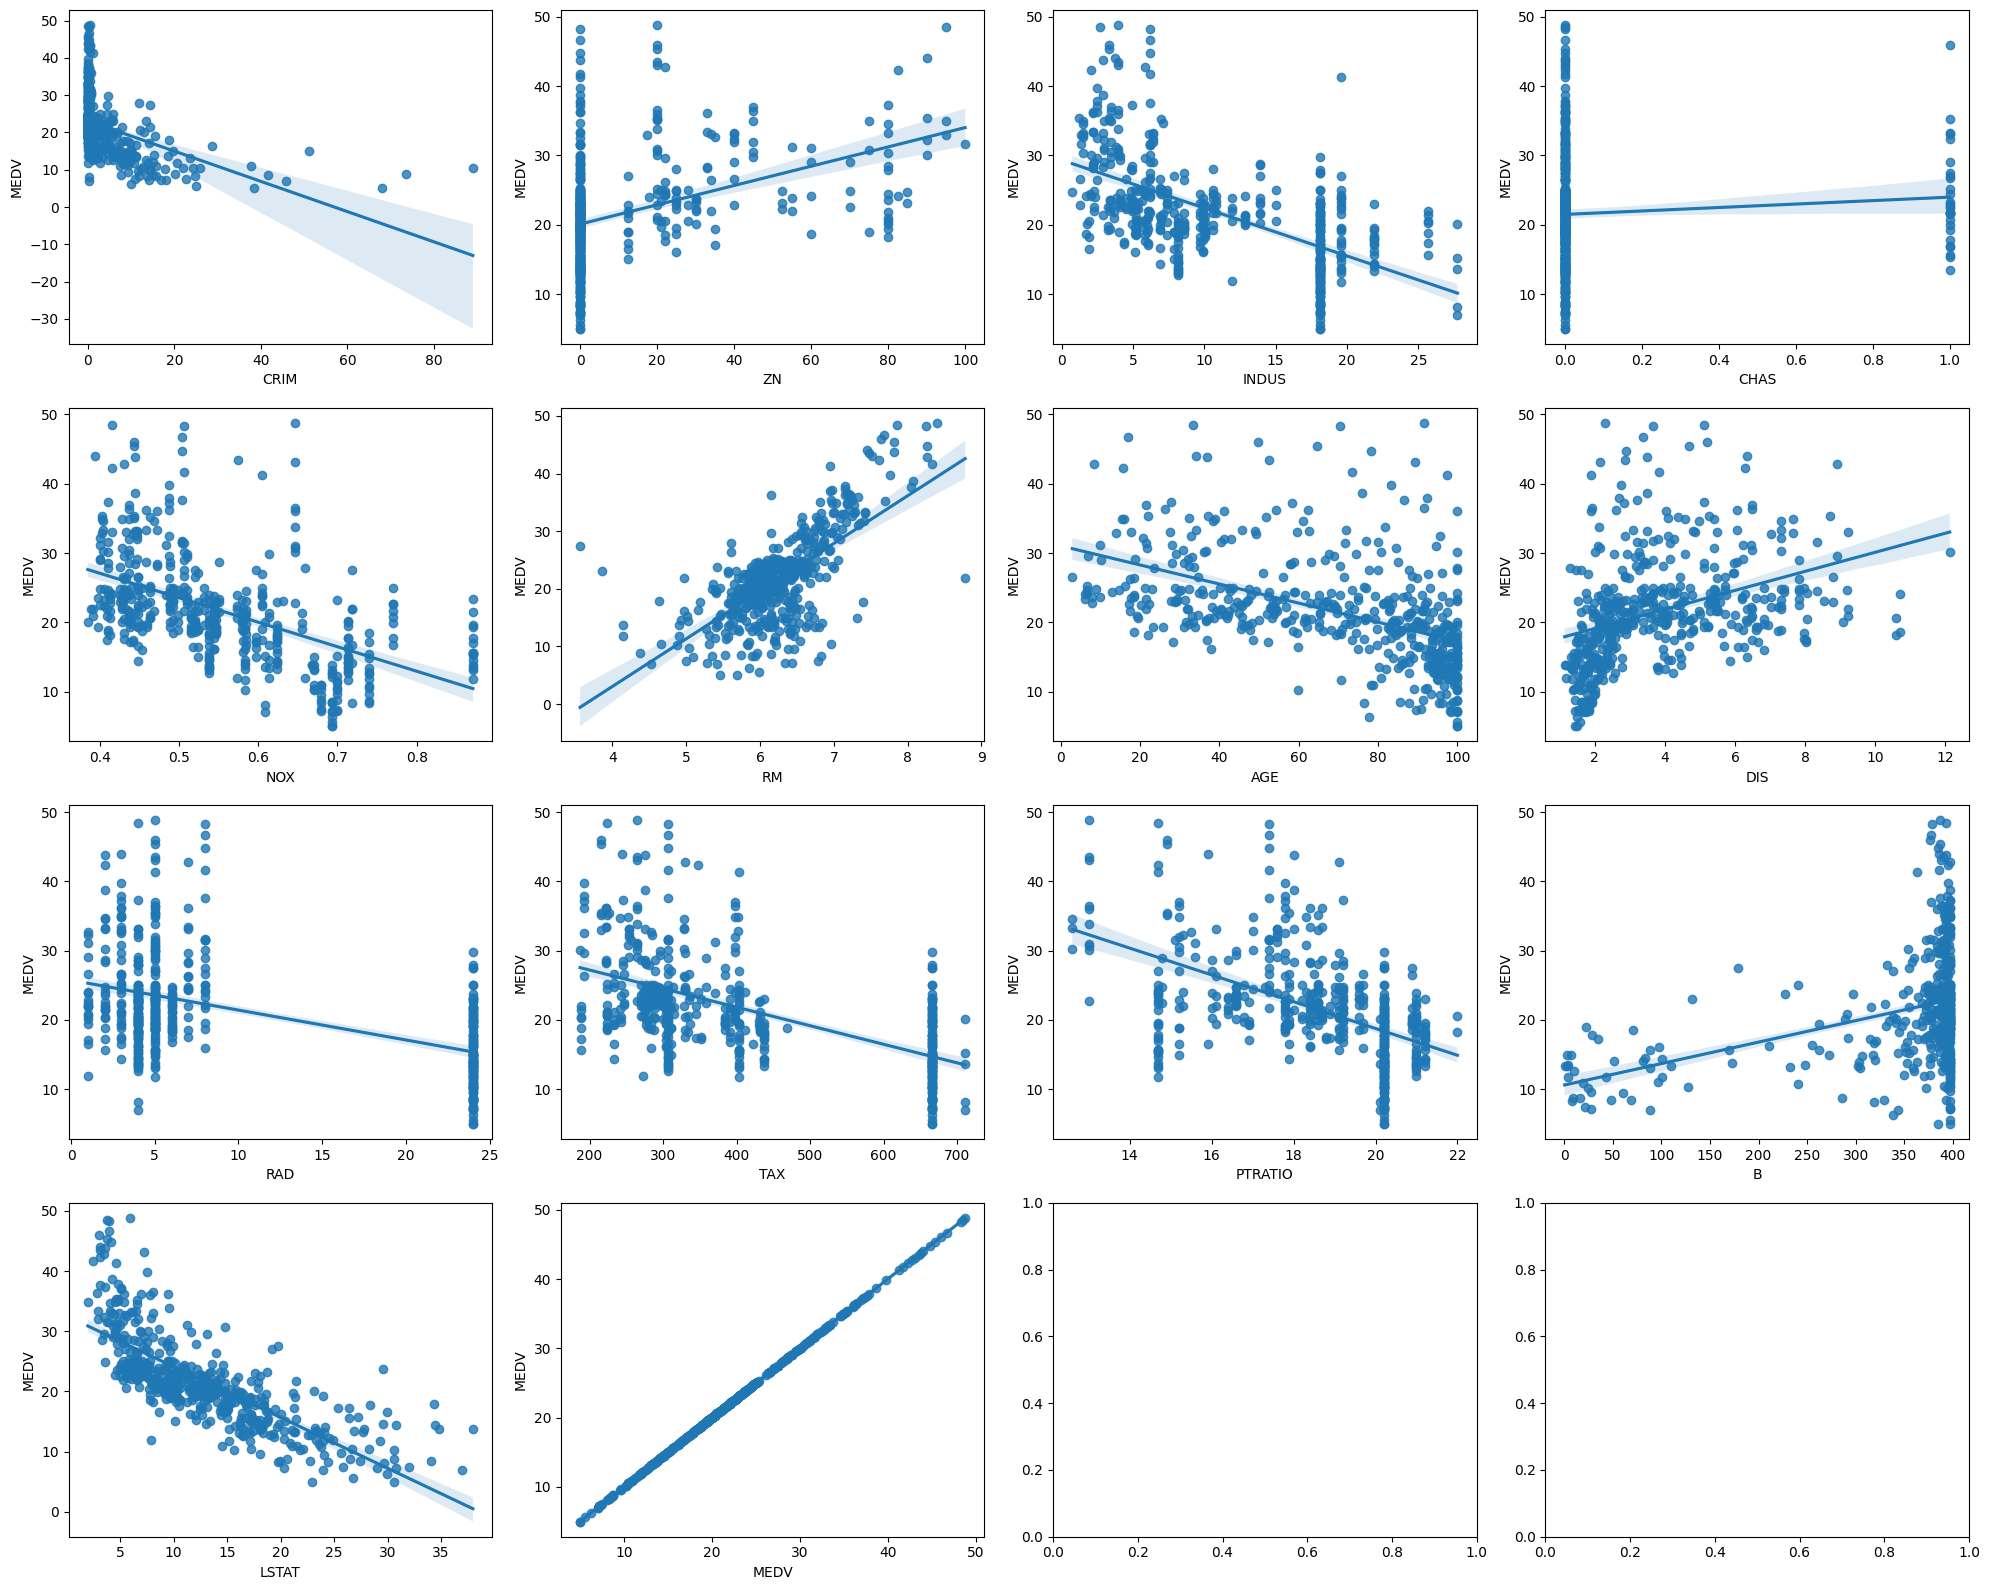

In [241]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize = (20,16))
index = 0
for i in df_low_prices.columns:
    sns.regplot(data = df_low_prices, x = i, y = 'MEDV', ax = ax[index//4, index%4])
    index+=1
plt.tight_layout()

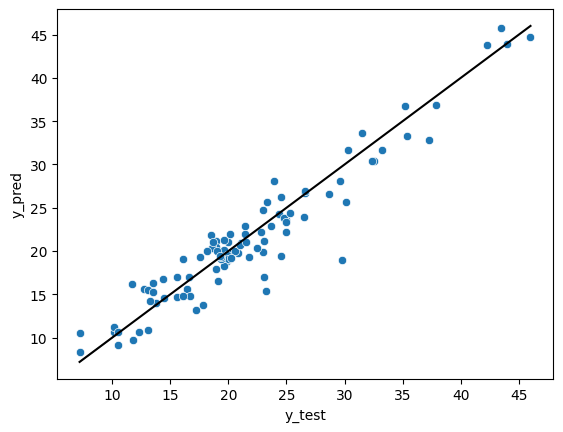

In [264]:
g =sns.scatterplot(x = y_test, y = y_pred)
g = sns.lineplot(x = y_test, y = y_test, color = 'black')
g.set_ylabel('y_pred')
g.set_xlabel('y_test')
plt.show()

Text(0.5, 1.0, 'Prediction Residuals')

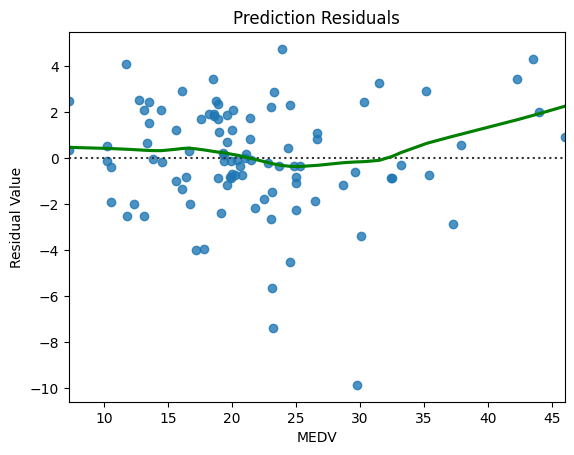

In [275]:
g = sns.residplot(x = y_test, y=y_pred, lowess=True, line_kws=dict(color = 'green') )
g.set_ylabel('Residual Value')
g.set_title('Prediction Residuals')

array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>,
        <Axes: xlabel='CHAS', ylabel='CRIM'>,
        <Axes: xlabel='NOX', ylabel='CRIM'>,
        <Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='DIS', ylabel='CRIM'>,
        <Axes: xlabel='RAD', ylabel='CRIM'>,
        <Axes: xlabel='TAX', ylabel='CRIM'>,
        <Axes: xlabel='PTRATIO', ylabel='CRIM'>,
        <Axes: xlabel='B', ylabel='CRIM'>,
        <Axes: xlabel='LSTAT', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='NOX', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='AGE', ylabel='ZN'>,
        <Axes: xlabel='DIS', ylabel='ZN'>,
        <Axes: x

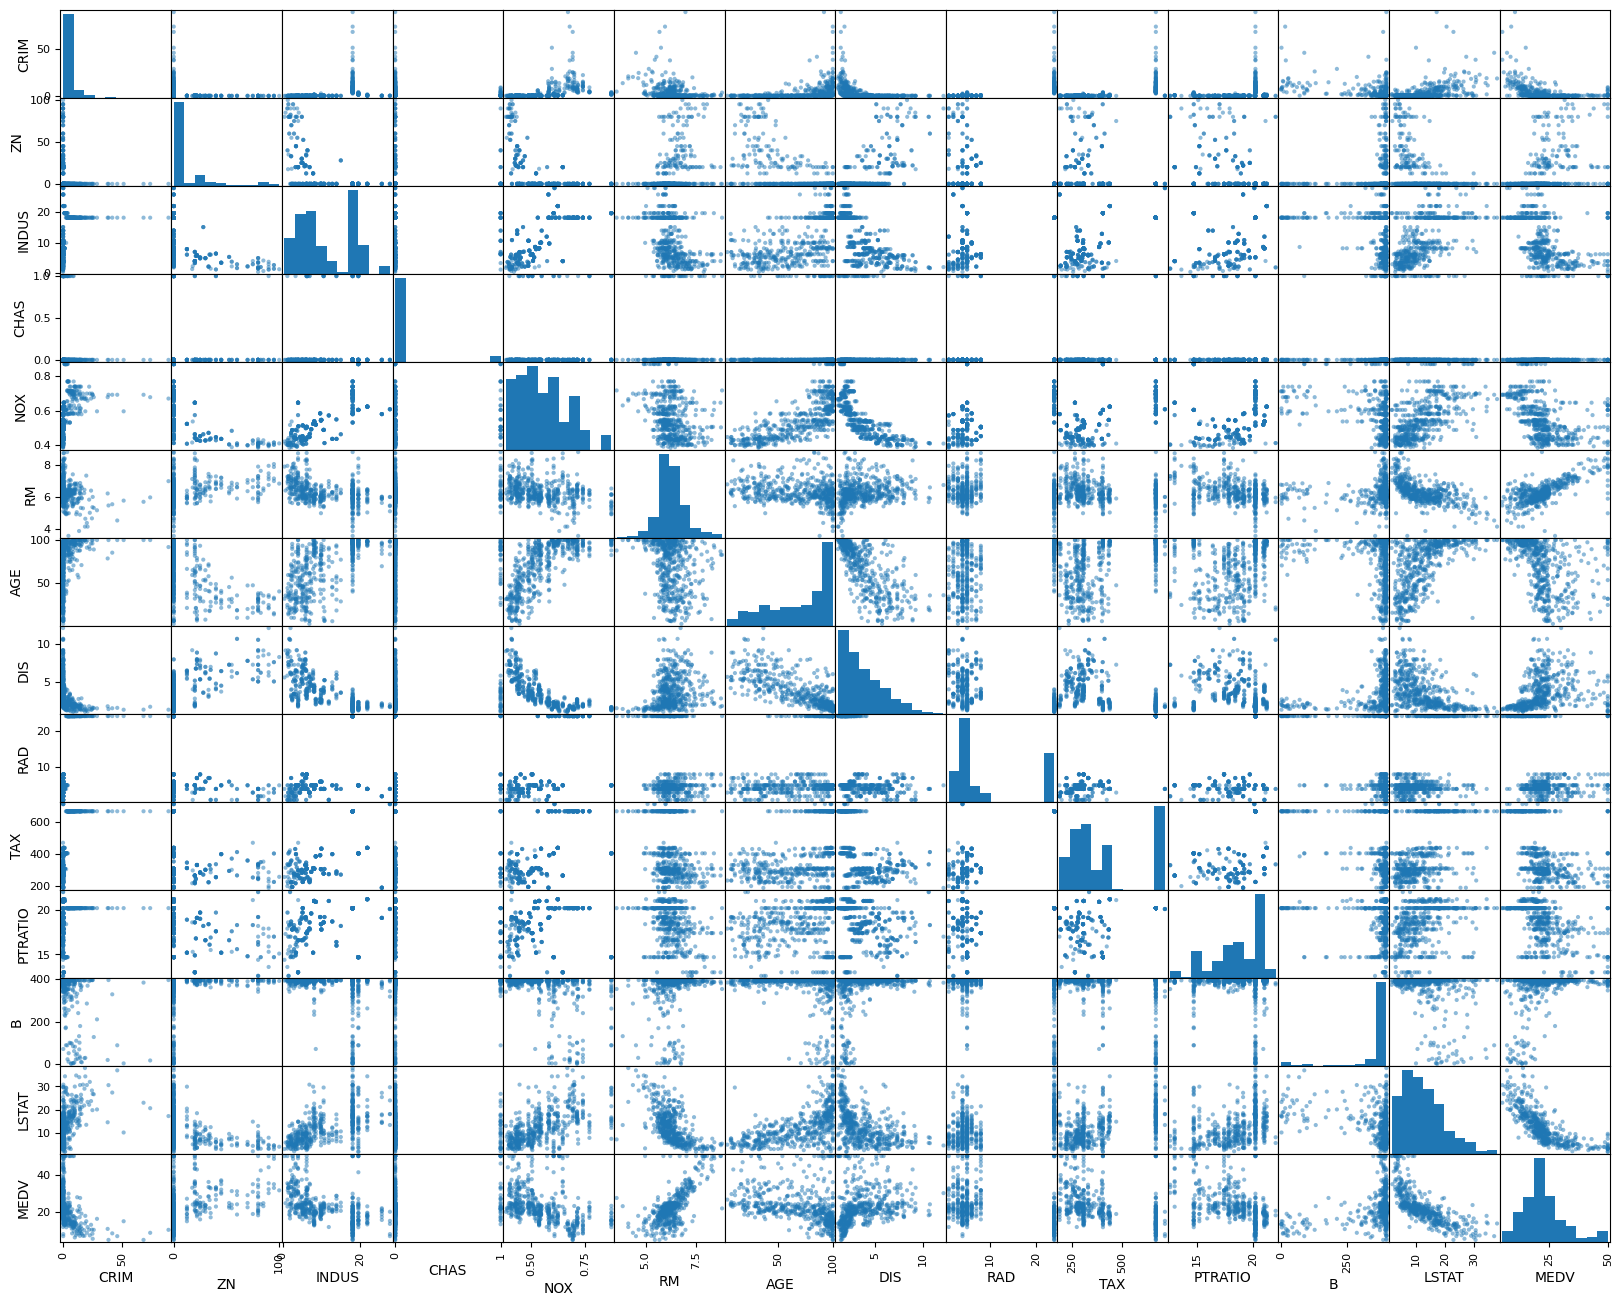

In [249]:
pd.plotting.scatter_matrix(df, figsize=(20,16))

array([[<Axes: xlabel='INDUS', ylabel='INDUS'>,
        <Axes: xlabel='RM', ylabel='INDUS'>,
        <Axes: xlabel='TAX', ylabel='INDUS'>,
        <Axes: xlabel='PTRATIO', ylabel='INDUS'>,
        <Axes: xlabel='LSTAT', ylabel='INDUS'>,
        <Axes: xlabel='MEDV', ylabel='INDUS'>],
       [<Axes: xlabel='INDUS', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='TAX', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>],
       [<Axes: xlabel='INDUS', ylabel='TAX'>,
        <Axes: xlabel='RM', ylabel='TAX'>,
        <Axes: xlabel='TAX', ylabel='TAX'>,
        <Axes: xlabel='PTRATIO', ylabel='TAX'>,
        <Axes: xlabel='LSTAT', ylabel='TAX'>,
        <Axes: xlabel='MEDV', ylabel='TAX'>],
       [<Axes: xlabel='INDUS', ylabel='PTRATIO'>,
        <Axes: xlabel='RM', ylabel='PTRATIO'>,
        <Axes: xlabel='TAX', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO

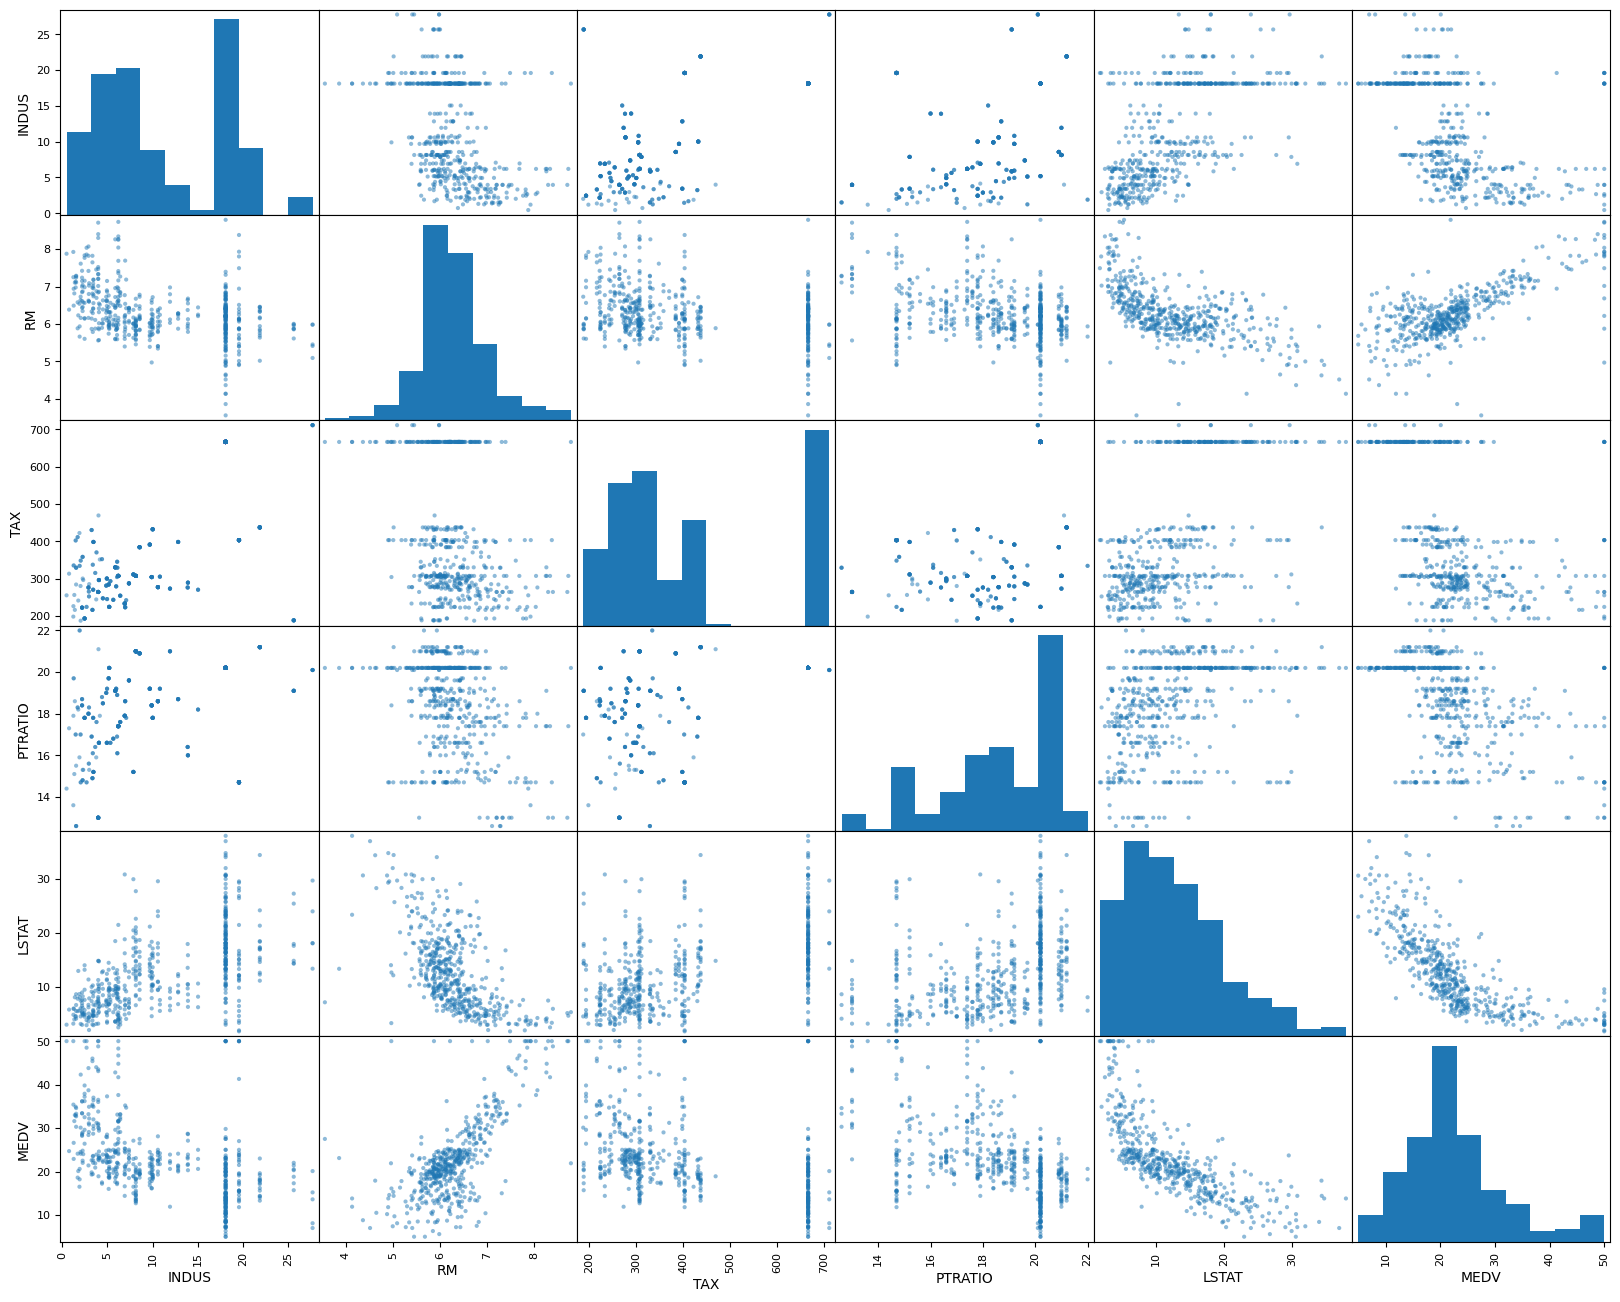

In [251]:
pd.plotting.scatter_matrix(df[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']], figsize=(20,16))

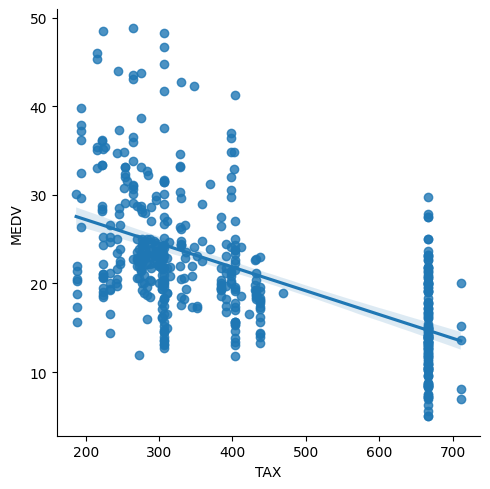

In [281]:
sns.lmplot( data = df_low_prices, x= 'TAX', y = 'MEDV')

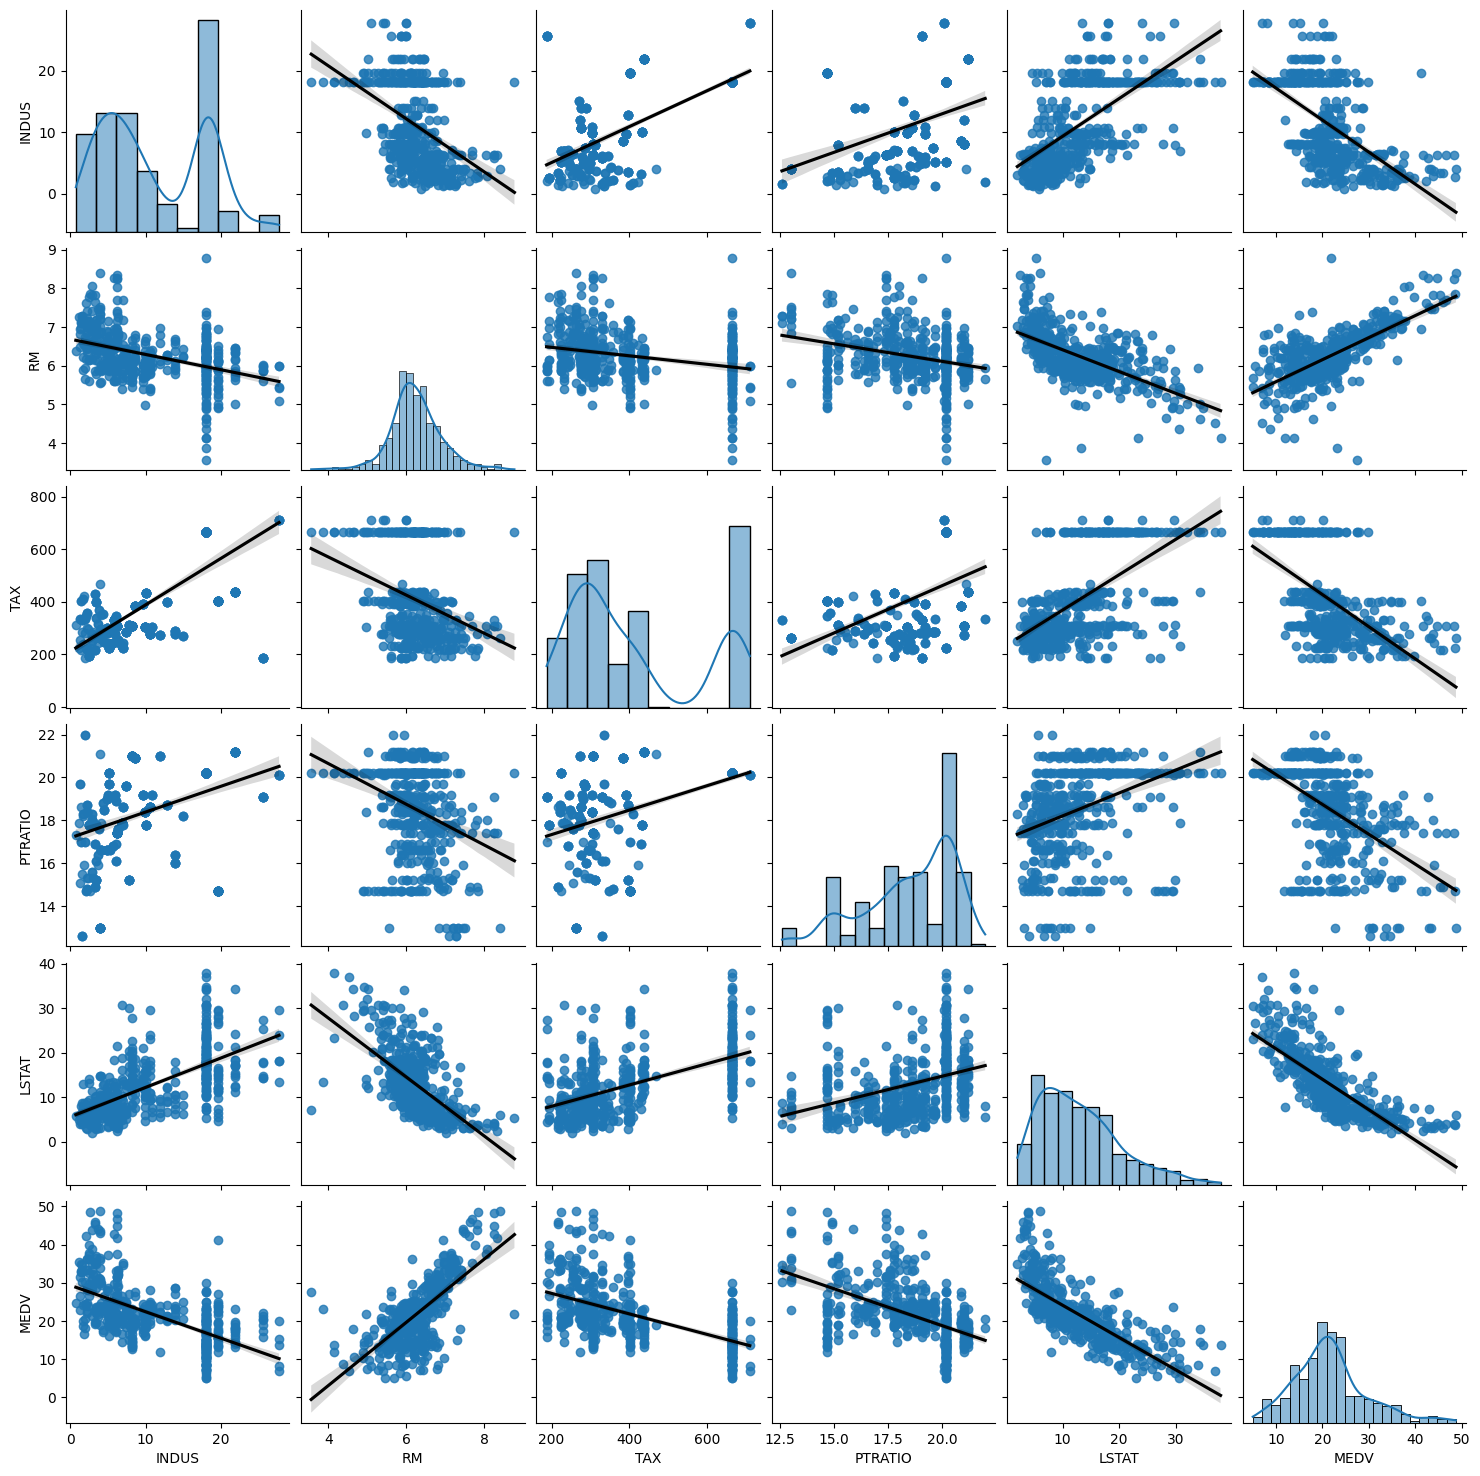

In [286]:
sns.pairplot(df_low_prices, vars = ['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], kind='reg', diag_kind='hist',
             diag_kws={'kde':True}, plot_kws={'line_kws':{'color':'black'}})

<Axes: >

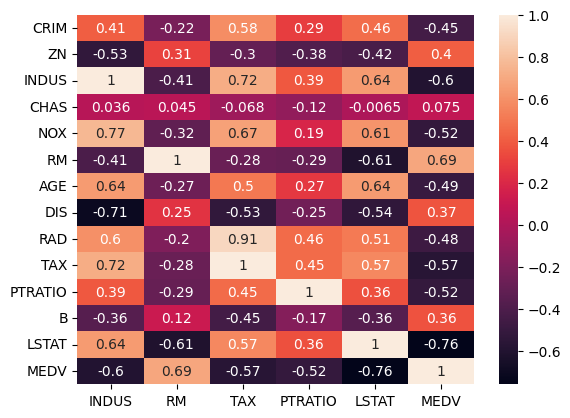

In [290]:
sns.heatmap(df_or_corr[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']], annot=True)

<Axes: >

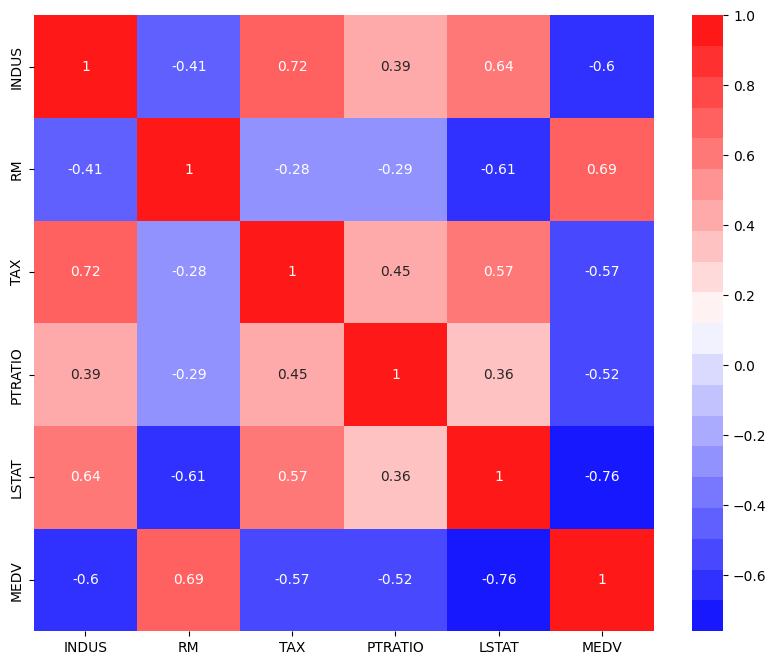

In [307]:
df_a = df_low_prices[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_a, annot=True, ax=ax, cmap=sns.color_palette('bwr', 20))

In [308]:
X_train

RM    TAX  PTRATIO  LSTAT  INDUS
194  6.604  265.0     15.6   4.38   2.93
293  6.127  289.0     16.0   8.58  13.92
107  6.127  384.0     20.9  14.09   8.56
0    6.575  296.0     15.3   4.98   2.31
408  5.617  666.0     20.2  26.40  18.10
..     ...    ...      ...    ...    ...
98   7.820  276.0     18.0   3.57   2.89
492  5.983  711.0     20.1  13.35  27.74
333  6.316  224.0     20.2   5.68   5.19
398  5.453  666.0     20.2  30.59  18.10
381  6.545  666.0     20.2  21.08  18.10

[392 rows x 5 columns]

In [330]:
def my_mse(a, b):
    a = a.to_numpy()
    sum = 0
    for i in range(len(a)):
        sum+=(a[i]-b[i])**2
    sum/=len(a)
    return sum

def my_rmse(a, b):
    return math.sqrt(my_mse(a,b))

def my_mae(a,b):
    a = a.to_numpy()
    sum = 0
    for i in range(len(a)):
        sum+=abs(a[i]-b[i])
    sum/=len(a)
    return sum

def my_r2(a,b):
    a = a.to_numpy()
    y_bar = sum(a)/len(a)
    ss_res = 0
    ss_tot = 0
    for i in range(len(a)):
        ss_res+=(a[i]-b[i])**2
    for j in range(len(a)):
        ss_tot+=(a[j]-y_bar)**2
    return 1-(ss_res/ss_tot)

my_r2(y_test, y_pred)

0.9020275933906641

In [323]:
y_pred[0]

19.291898347467363